Import library yang dibutuhkan

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix

Read dataset & melihat detail dataset

In [35]:
df = pd.read_csv('new_dataset.csv')
df.head()

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,Spectral_Cluster,Cuaca
0,2018-01-01,24.0,34.0,28.1,80.0,21.300000,8.0,6.0,240.0,3.5,8.0,96733.0,4,Hujan
1,2018-01-02,24.0,34.0,29.7,75.0,10.344604,6.9,5.0,250.0,3.5,8.0,96733.0,4,Hujan
2,2018-01-03,26.0,34.8,28.3,78.0,10.344604,4.3,5.0,280.0,3.5,8.0,96733.0,4,Hujan
3,2018-01-04,26.0,33.8,29.0,76.0,10.344604,4.8,5.0,230.0,3.5,8.0,96733.0,4,Hujan
4,2018-01-05,26.0,30.8,27.8,72.0,0.300000,1.8,7.0,250.0,3.5,8.0,96733.0,4,Hujan


In [36]:
df.describe()

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,Spectral_Cluster
count,30088.000000,30088.000000,30088.000000,30088.000000,30088.000000,30088.000000,30088.000000,30088.000000,30088.000000,30088.000000,30088.000000,30088.000000
mean,23.498272,31.655142,26.996674,78.730173,6.426236,6.087071,4.589094,182.918132,1.780833,2.578204,96849.674953,2.254188
std,2.554303,2.265170,2.211064,7.667402,8.071230,2.934749,1.907618,108.157363,0.913331,2.658078,88.086450,1.109997
min,17.200000,26.200000,21.850000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96733.000000,1.000000
25%,22.000000,30.400000,25.900000,74.000000,0.000000,3.800000,3.000000,90.000000,1.000000,0.000000,96753.000000,1.000000
50%,24.000000,32.000000,27.500000,79.000000,2.900000,6.500000,4.000000,170.000000,2.000000,2.000000,96839.000000,2.000000
75%,25.200000,33.200000,28.600000,84.000000,10.344604,8.500000,6.000000,280.000000,2.000000,5.000000,96939.000000,3.000000
max,30.000000,37.400000,32.650000,99.000000,25.861511,15.550000,10.500000,360.000000,3.500000,8.000000,96987.000000,4.000000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30088 entries, 0 to 30087
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              30088 non-null  object 
 1   Tn                30088 non-null  float64
 2   Tx                30088 non-null  float64
 3   Tavg              30088 non-null  float64
 4   RH_avg            30088 non-null  float64
 5   RR                30088 non-null  float64
 6   ss                30088 non-null  float64
 7   ff_x              30088 non-null  float64
 8   ddd_x             30088 non-null  float64
 9   ff_avg            30088 non-null  float64
 10  ddd_car           30088 non-null  float64
 11  station_id        30088 non-null  float64
 12  Spectral_Cluster  30088 non-null  int64  
 13  Cuaca             30088 non-null  object 
dtypes: float64(11), int64(1), object(2)
memory usage: 3.2+ MB


In [38]:
df.isna().sum()

date                0
Tn                  0
Tx                  0
Tavg                0
RH_avg              0
RR                  0
ss                  0
ff_x                0
ddd_x               0
ff_avg              0
ddd_car             0
station_id          0
Spectral_Cluster    0
Cuaca               0
dtype: int64

Mengecek apakah ada outlier / tidak

In [39]:
def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1

    outliers = df[(df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))]
    return outliers

def print_outlier(df):
    numeric_df = df.select_dtypes(include=[np.number])
    for i in numeric_df.columns:
        print(f"Number of Outliers in {i}: {len(check_outlier(numeric_df[i]))}")

print_outlier(df)

Number of Outliers in Tn: 0
Number of Outliers in Tx: 0
Number of Outliers in Tavg: 0
Number of Outliers in RH_avg: 0
Number of Outliers in RR: 0
Number of Outliers in ss: 0
Number of Outliers in ff_x: 0
Number of Outliers in ddd_x: 0
Number of Outliers in ff_avg: 0
Number of Outliers in ddd_car: 0
Number of Outliers in station_id: 0
Number of Outliers in Spectral_Cluster: 0


In [40]:
df.drop(columns=['date','Cuaca'], axis=1, inplace=True)

Plotting Correlation Heatmap

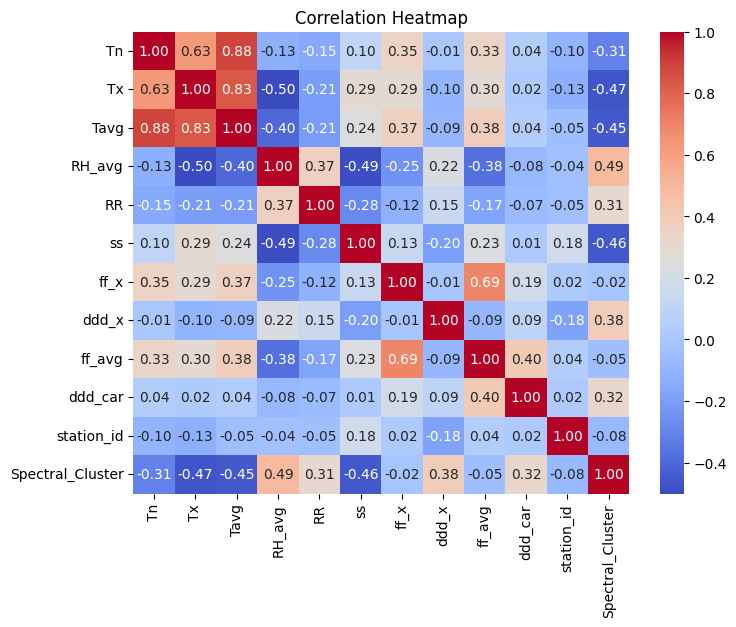

In [41]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Normalisasi

In [42]:
sc = StandardScaler()
X = df.drop(['Spectral_Cluster'], axis=1)
y = df['Spectral_Cluster']

X = sc.fit_transform(X)

Train - Test dataset split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Model Training

In [44]:
modelKNC = KNeighborsClassifier()
modelSVC = SVC()
modelNB = GaussianNB()
modelRFC = RandomForestClassifier()

modelKNC.fit(X_train, y_train)
modelSVC.fit(X_train, y_train)
modelNB.fit(X_train, y_train)
modelRFC.fit(X_train, y_train)

RandomForestClassifier()

Plotting Confusion Matrix

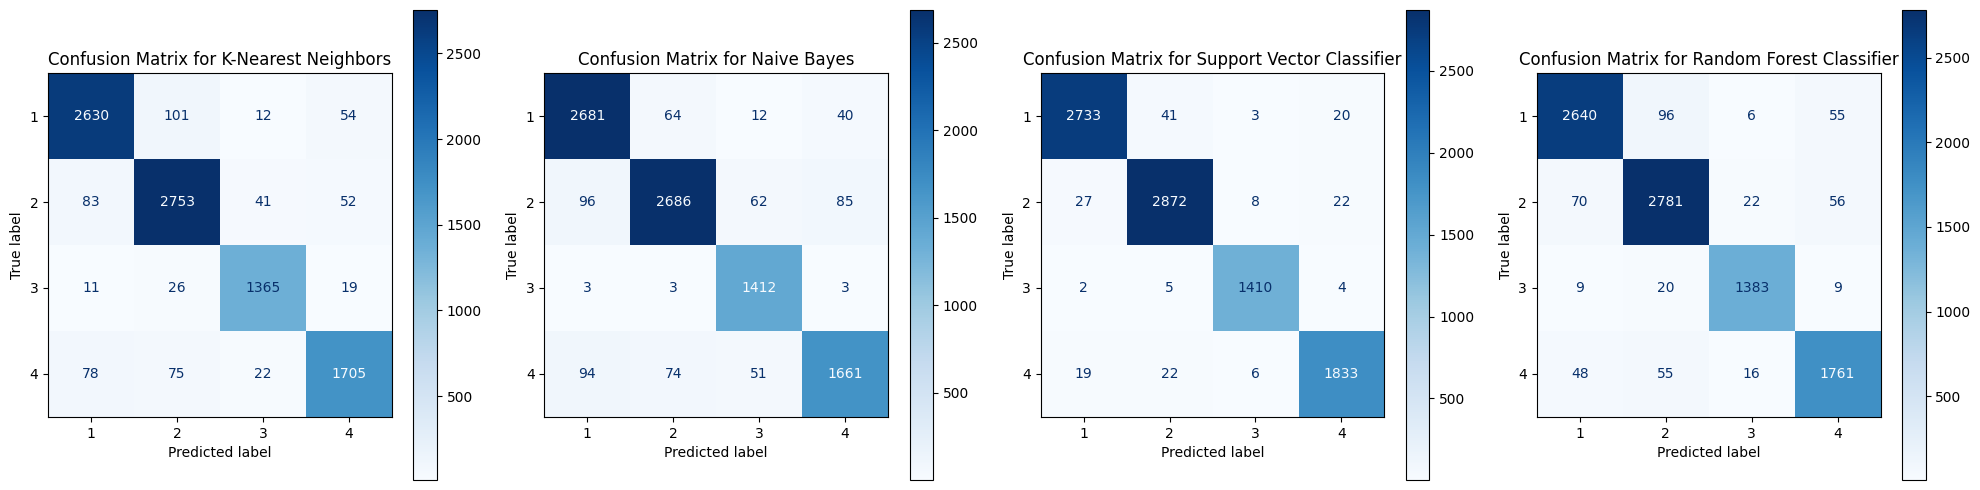

In [45]:
def plot_confusion_matrices(models, X_test, y_test):
    num_models = len(models)
    fig, axes = plt.subplots(1, num_models, figsize=(5 * num_models, 5))
    
    if num_models == 1:
        axes = [axes]
    
    for ax, (model, name) in zip(axes, models):
        cm = confusion_matrix(y_test, model.predict(X_test))
        disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
        disp.plot(ax=ax, cmap=plt.cm.Blues)
        ax.set_title(f'Confusion Matrix for {name}')
    
    plt.tight_layout()
    plt.show()

models = [
    (modelKNC, "K-Nearest Neighbors"),
    (modelNB, "Naive Bayes"),
    (modelSVC, "Support Vector Classifier"),
    (modelRFC, "Random Forest Classifier")
]

plot_confusion_matrices(models, X_test, y_test)

Model Evaluation

In [46]:
print("K-Nearest Neighbor :", accuracy_score(y_test,modelKNC.predict(X_test)))
print(classification_report(y_test,modelKNC.predict(X_test)))

print("Naive Bayes :", accuracy_score(y_test,modelNB.predict(X_test)))
print(classification_report(y_test,modelNB.predict(X_test)))

print("SVC :", accuracy_score(y_test,modelSVC.predict(X_test)))
print(classification_report(y_test,modelSVC.predict(X_test)))

print("Random Forest :", accuracy_score(y_test,modelRFC.predict(X_test)))
print(classification_report(y_test,modelRFC.predict(X_test)))

K-Nearest Neighbor : 0.936412983272405
              precision    recall  f1-score   support

           1       0.94      0.94      0.94      2797
           2       0.93      0.94      0.94      2929
           3       0.95      0.96      0.95      1421
           4       0.93      0.91      0.92      1880

    accuracy                           0.94      9027
   macro avg       0.94      0.94      0.94      9027
weighted avg       0.94      0.94      0.94      9027

Naive Bayes : 0.9349728592001773
              precision    recall  f1-score   support

           1       0.93      0.96      0.95      2797
           2       0.95      0.92      0.93      2929
           3       0.92      0.99      0.95      1421
           4       0.93      0.88      0.91      1880

    accuracy                           0.93      9027
   macro avg       0.93      0.94      0.93      9027
weighted avg       0.94      0.93      0.93      9027

SVC : 0.9801705993131716
              precision    recall

In [47]:
# Check Training Score
print(modelKNC.score(X_train, y_train))
print(modelSVC.score(X_train, y_train))
print(modelNB.score(X_train, y_train))
print(modelRFC.score(X_train, y_train))

0.9622999857556621
0.9892692654669769
0.9351882626655904
1.0


Plot Perbandingan Accuracy Score dari masing-masing Model

C:\Users\Rave\AppData\Local\Temp\ipykernel_14104\3328279615.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=score, y=model, palette='viridis')


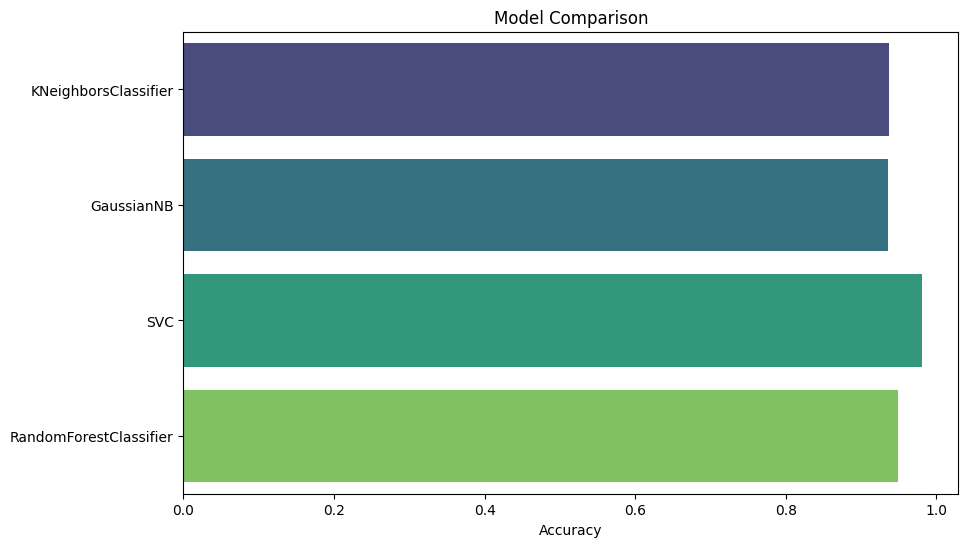

In [48]:
knn = accuracy_score(y_test,modelKNC.predict(X_test))
nb = accuracy_score(y_test,modelNB.predict(X_test))
svc = accuracy_score(y_test,modelSVC.predict(X_test))
rfc = accuracy_score(y_test,modelRFC.predict(X_test))

model = ['KNeighborsClassifier', 'GaussianNB', 'SVC', 'RandomForestClassifier']

score = [knn, nb, svc, rfc]

plt.figure(figsize=(10, 6))
sns.barplot(x=score, y=model, palette='viridis')
plt.title('Model Comparison')
plt.xlabel('Accuracy')
plt.show()